In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, root_mean_squared_error



In [2]:
# 1. Вивести перших 5 рядків.
diabetes = load_diabetes()
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target
df.head(5)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [3]:
# 2. Перевірити наявність пропусків. У разі виявлення замінити на середнє значення.
df.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

In [4]:
# 3. Перевірити наявність дублікатів, при виявленні – видалити.
df.duplicated().sum()

0

In [5]:
# 4. Замінити бінарні ознаки. У стовпчику «стать» спочатку перевірте унікальні значення.
unique_values = df['sex'].unique()
replace_dict = {unique_values[0]: 0, unique_values[1]: 1}
df['sex'] = df['sex'].replace(replace_dict)
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.0,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,1.0,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.0,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,1.0,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,1.0,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.0,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.0,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.0,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,1.0,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [6]:
# 5. Перевірити тип даних. При необхідності замінити тип даних на числовий.
df.dtypes

age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object

In [7]:
# 6. Обчислити кореляцію між прогресом діабету і іншмим ознаками. Розташувати в порядку спадання.
# Побудувати теплову карту кореляції.
correlation = df.corr()['target'].sort_values(ascending=False)
correlation

target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex      -0.043062
s3       -0.394789
Name: target, dtype: float64

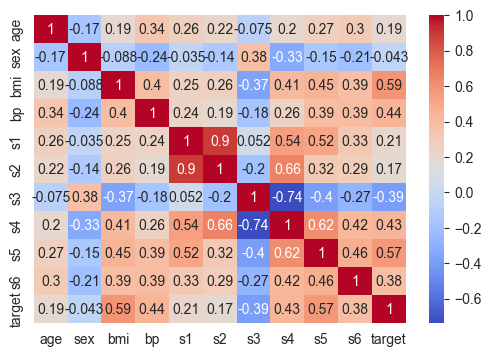

In [11]:
# Теплова карта кореляції
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [13]:
# 7. Масштабувати ознаки.
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [14]:
# 8. Поділити дані на тренувальну і тестову вибірки.
X = df_scaled.drop('target', axis=1)
y = df_scaled['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# 9. Побудувати модель лінійной регресії і RandomForest регресії на основі більш корелюючих ознак (підібрати оптимальне число).
# Вибір більш корелюючих ознак
top_features = correlation.index[1:6]  # Вибір топ-5 ознак
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

# Лінійна регресія
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_lr = linear_model.predict(X_test)

# RandomForest регресія
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_top, y_train)
y_pred_rf = rf.predict(X_test_top)

In [17]:
# 10. Вивести коефіцієнт детермінації і середньоквадратичну помилку.
# Лінійна регресія
print("Linear Regression:")
print("R^2:", r2_score(y_test, y_pred_lr))
print("RMSE:", root_mean_squared_error(y_test, y_pred_lr))

# RandomForest регресія
print("RandomForest Regression:")
print("R^2:", r2_score(y_test, y_pred_rf))
print("RMSE:", root_mean_squared_error(y_test, y_pred_rf))

Linear Regression:
R^2: 0.45260276297191904
RMSE: 0.69934321431111
RandomForest Regression:
R^2: 0.41322400009436056
RMSE: 0.7240611335973067


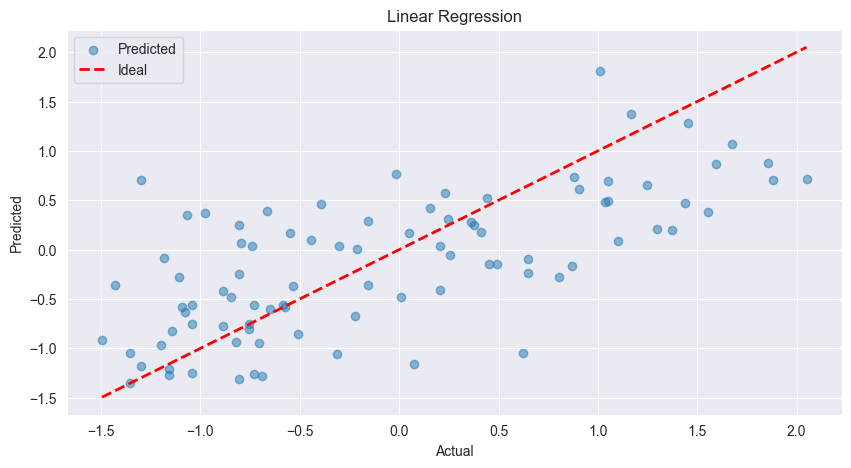

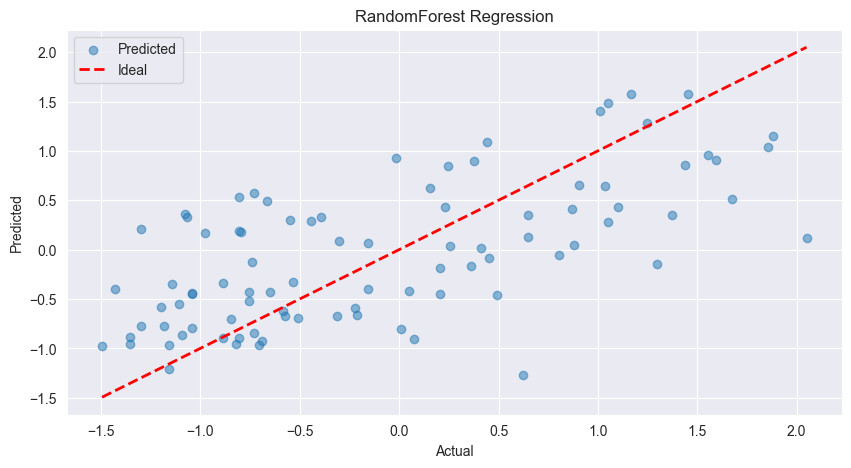

In [18]:
# 11. Побудувати графіки.
# Графіки для лінійної регресії
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_lr, alpha=0.5, label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Linear Regression")
plt.legend()
plt.show()

# Графіки для RandomForest регресії
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_rf, alpha=0.5, label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("RandomForest Regression")
plt.legend()
plt.show()

In [19]:
# 12. Вивести справжні і прогнозовані значення.
results_lr = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_lr
})
results_rf = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_rf
})
results_lr, results_rf

(       Actual  Predicted
 287  0.868332  -0.163441
 211 -1.066589   0.355606
 72   0.647569  -0.234979
 321  1.011178   1.808742
 73  -0.534161  -0.368074
 ..        ...        ...
 255  0.011253  -0.482064
 90  -0.702980  -0.950288
 57  -1.495128  -0.916459
 391 -1.157491  -1.269431
 24   0.413820   0.183374
 
 [89 rows x 2 columns],
        Actual  Predicted
 287  0.868332   0.412002
 211 -1.066589   0.325645
 72   0.647569   0.352266
 321  1.011178   1.401279
 73  -0.534161  -0.330670
 ..        ...        ...
 255  0.011253  -0.807907
 90  -0.702980  -0.967635
 57  -1.495128  -0.972051
 391 -1.157491  -1.205020
 24   0.413820   0.019304
 
 [89 rows x 2 columns])